### Импорт библиотек и датасета

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import missingno as msno
import warnings

warnings.filterwarnings("ignore")

In [ ]:
vgsales = pd.read_csv("https://raw.githubusercontent.com/ElijahSum/mipt_visualization/master/week_01_visualization/data/vgsales.csv")
vgsales.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Совсем ничего не было сказано про тонкую настройку визуализации графиков - какой размер шрифта брать? можно ли менять шрифт? как оптимально определять размер графика? как работать с палитрой?

In [ ]:
sharex
sharey

Внутри общего алгоритма не увидел логики выбора инструмента визуализации. У меня не отложилось в голове какой график и в каком случае я должен использовать

### Стили в matplotlib (Style Sheets) и создание собственного стиля

Все описания стилей можно найти на страничке с [документацией](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html).

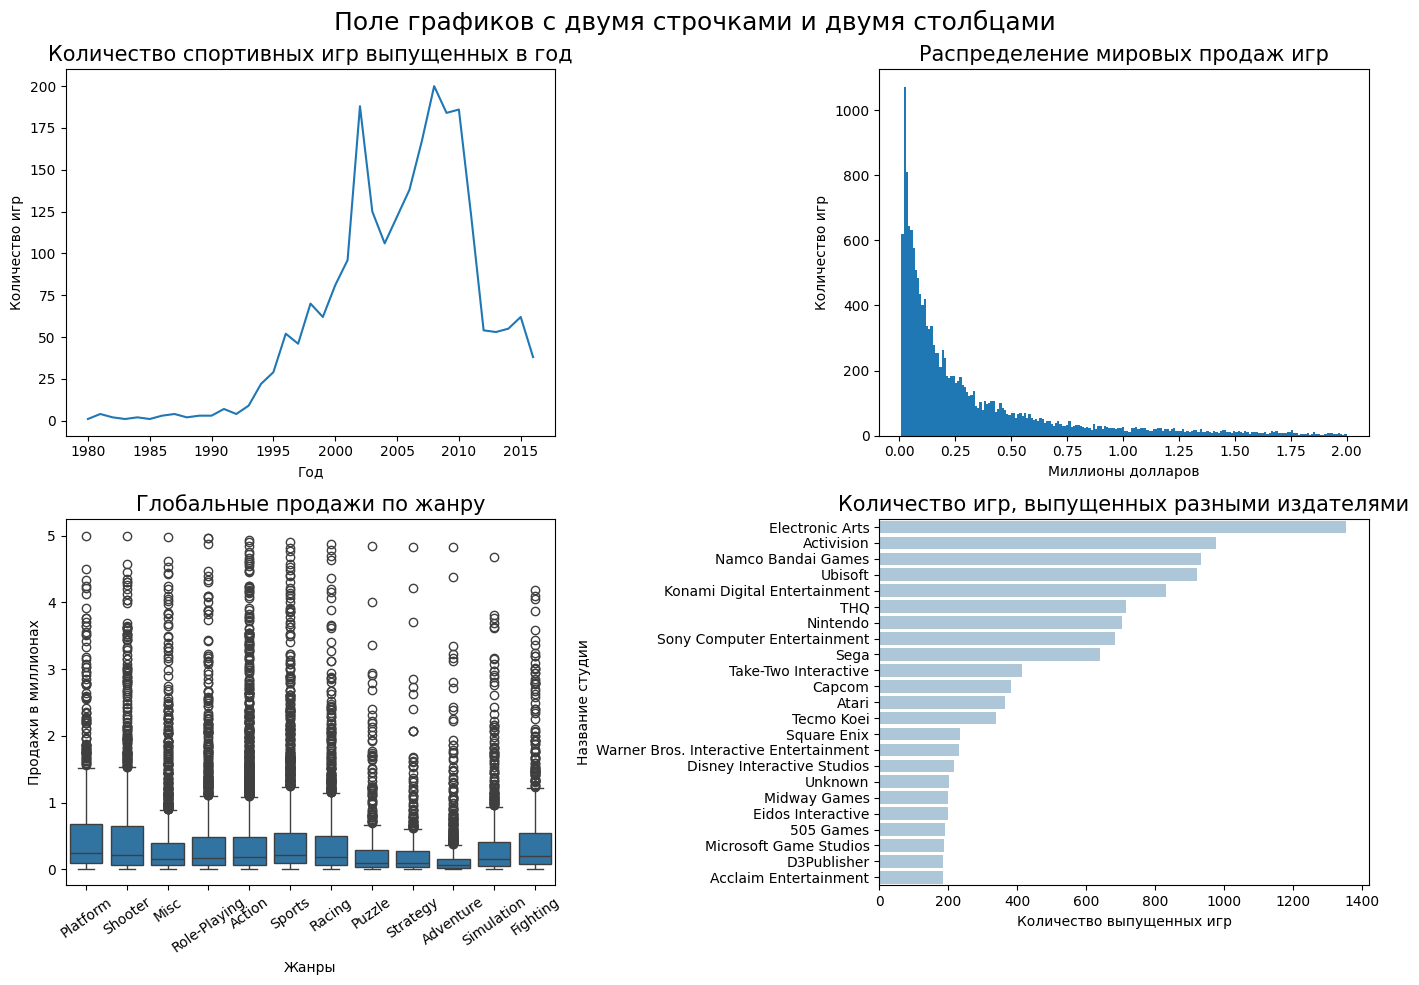

In [ ]:
from re import X
plt.style.use('default')

def subplots_class():
  fig, axs = plt.subplots(2, 2, figsize=(14, 10))

  fig.suptitle('Поле графиков с двумя строчками и двумя столбцами', fontsize=18) # Установка названия для всего поля

  # Первый график
  axs[0, 0].plot(vgsales[vgsales['Genre'] == 'Sports']['Year'].value_counts().sort_index())
  axs[0, 0].set_title("Количество спортивных игр выпущенных в год", fontsize=15)
  axs[0, 0].set_xlabel("Год")
  axs[0, 0].set_ylabel("Количество игр")

  # Второй график
  axs[0, 1].hist(vgsales['Global_Sales'][vgsales['Global_Sales'] <= 2], bins = 200)
  axs[0, 1].set_xlabel("Миллионы долларов")
  axs[0, 1].set_ylabel("Количество игр")
  axs[0, 1].set_title("Распределение мировых продаж игр", fontsize=15)

  # Третий график
  sns.boxplot(ax=axs[1, 0], x='Genre', y='Global_Sales', data=vgsales[vgsales['Global_Sales'] <= 5])
  axs[1, 0].set_title('Глобальные продажи по жанру', fontsize=15)
  axs[1, 0].set_xlabel("Жанры")
  axs[1, 0].set_ylabel("Продажи в миллионах")
  axs[1, 0].tick_params(axis='x', rotation=35)

  # Четвертый график
  games_publishers = vgsales['Publisher'].value_counts()[vgsales['Publisher'].value_counts(normalize=True)>=0.01]
  axs[1, 1].set_title("Количество игр, выпущенных разными издателями", fontsize=15)
  axs[1, 1].set_xlabel("Количество выпущенных игр")
  axs[1, 1].set_ylabel("Название студии")
  sns.barplot(ax=axs[1, 1], y=games_publishers.index, x=games_publishers.values, alpha=0.4)

  plt.tight_layout()
  plt.show()

subplots_class()

Чтобы посмотреть все доступные стили, можно воспользоваться следующим аттрибутом:

In [ ]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

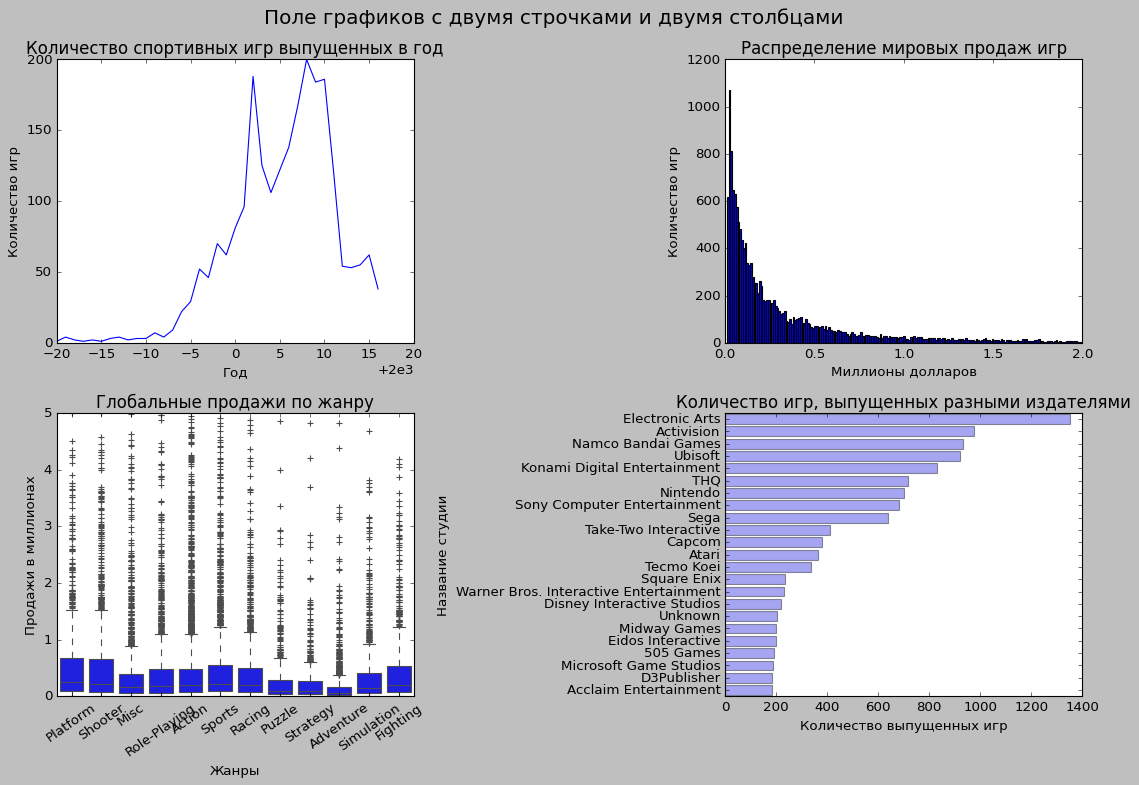

In [ ]:
plt.style.use('classic')

subplots_class()

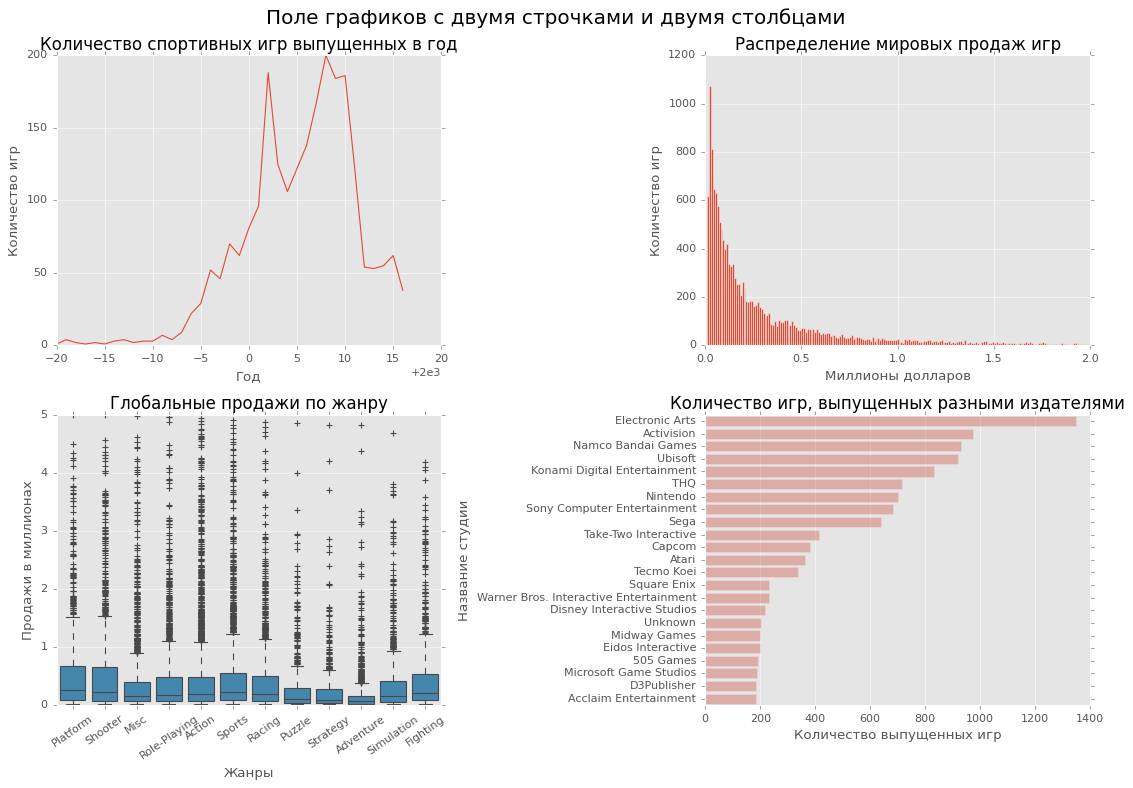

In [ ]:
plt.style.use('ggplot')

subplots_class()

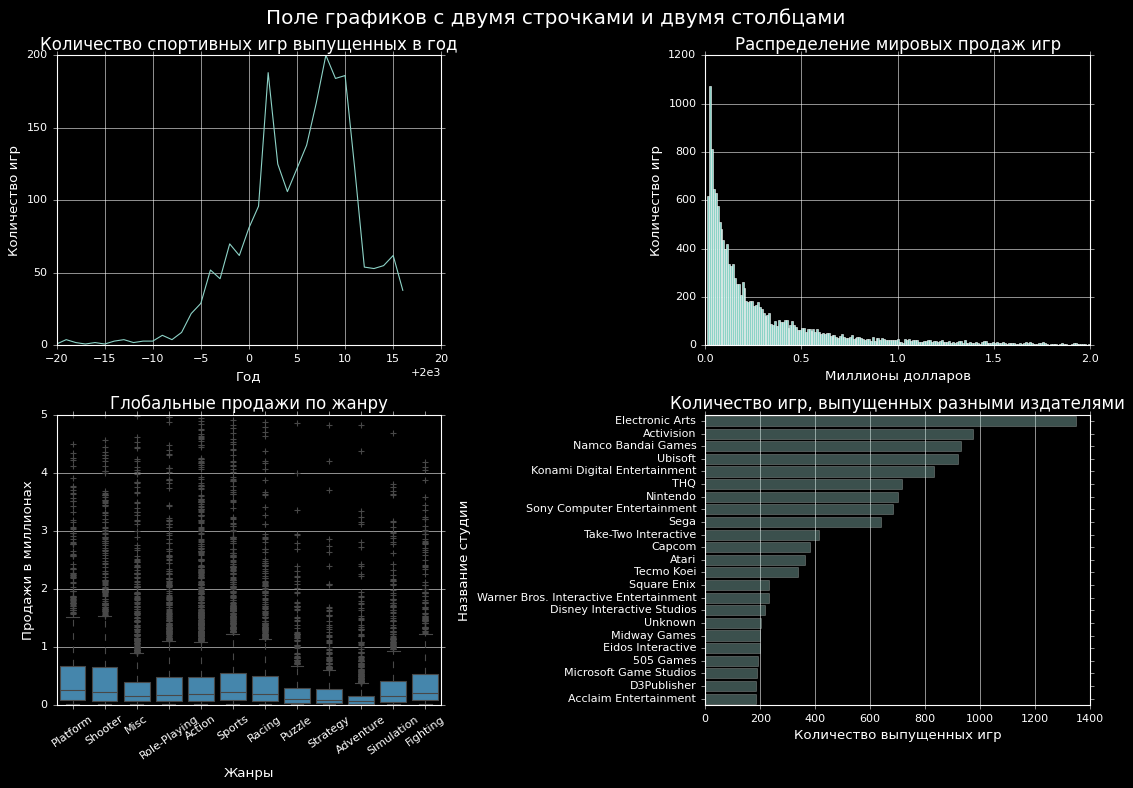

In [ ]:
plt.style.use('dark_background')

subplots_class()

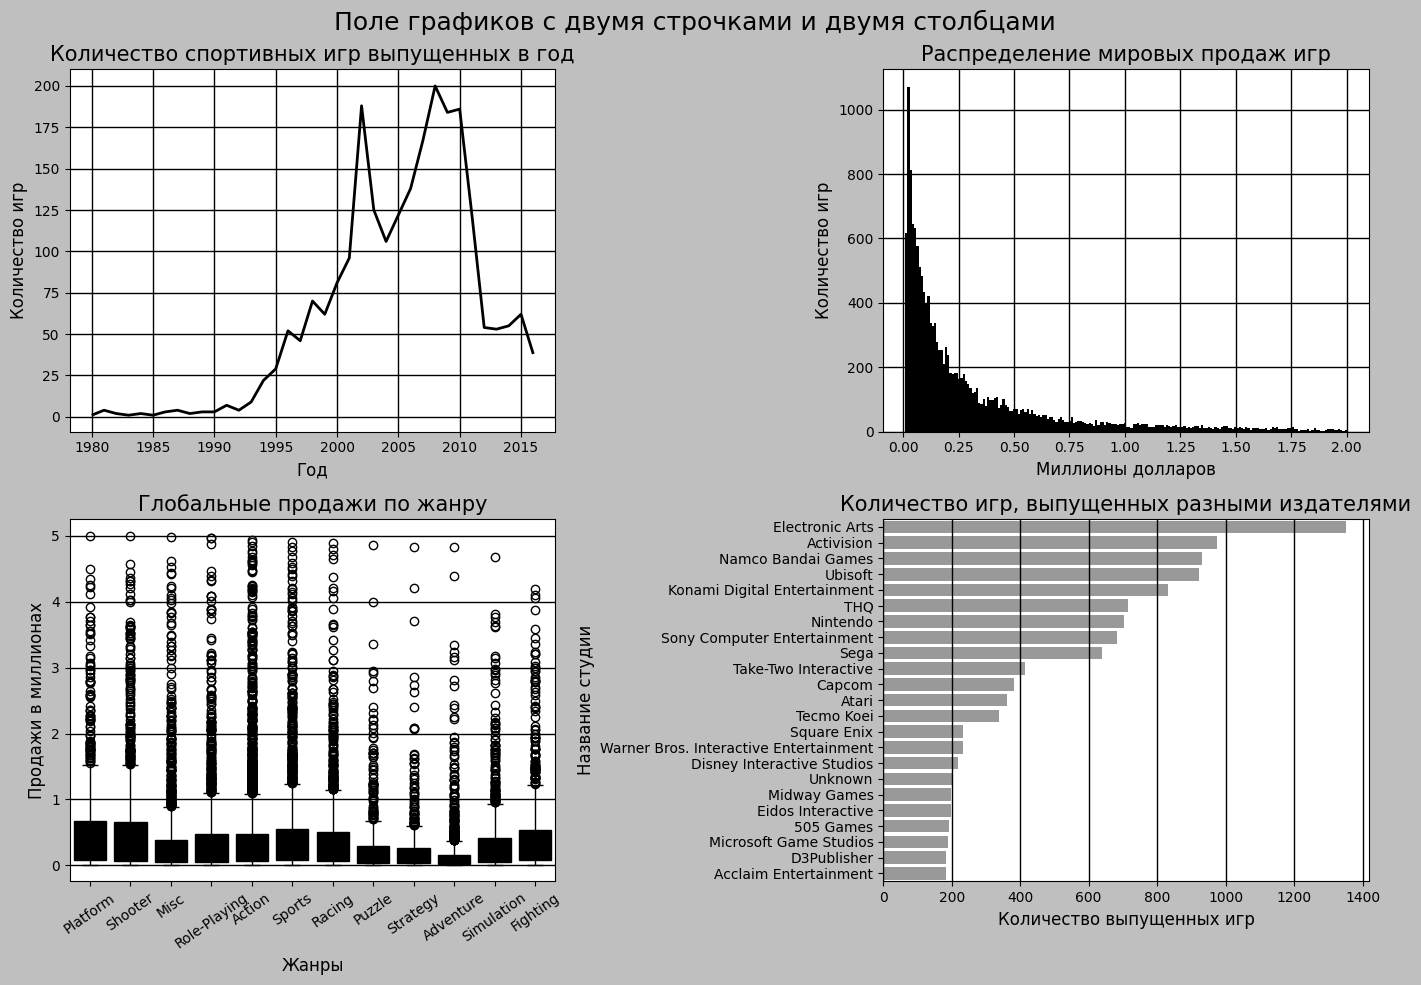

In [ ]:
plt.style.use('grayscale')

subplots_class()

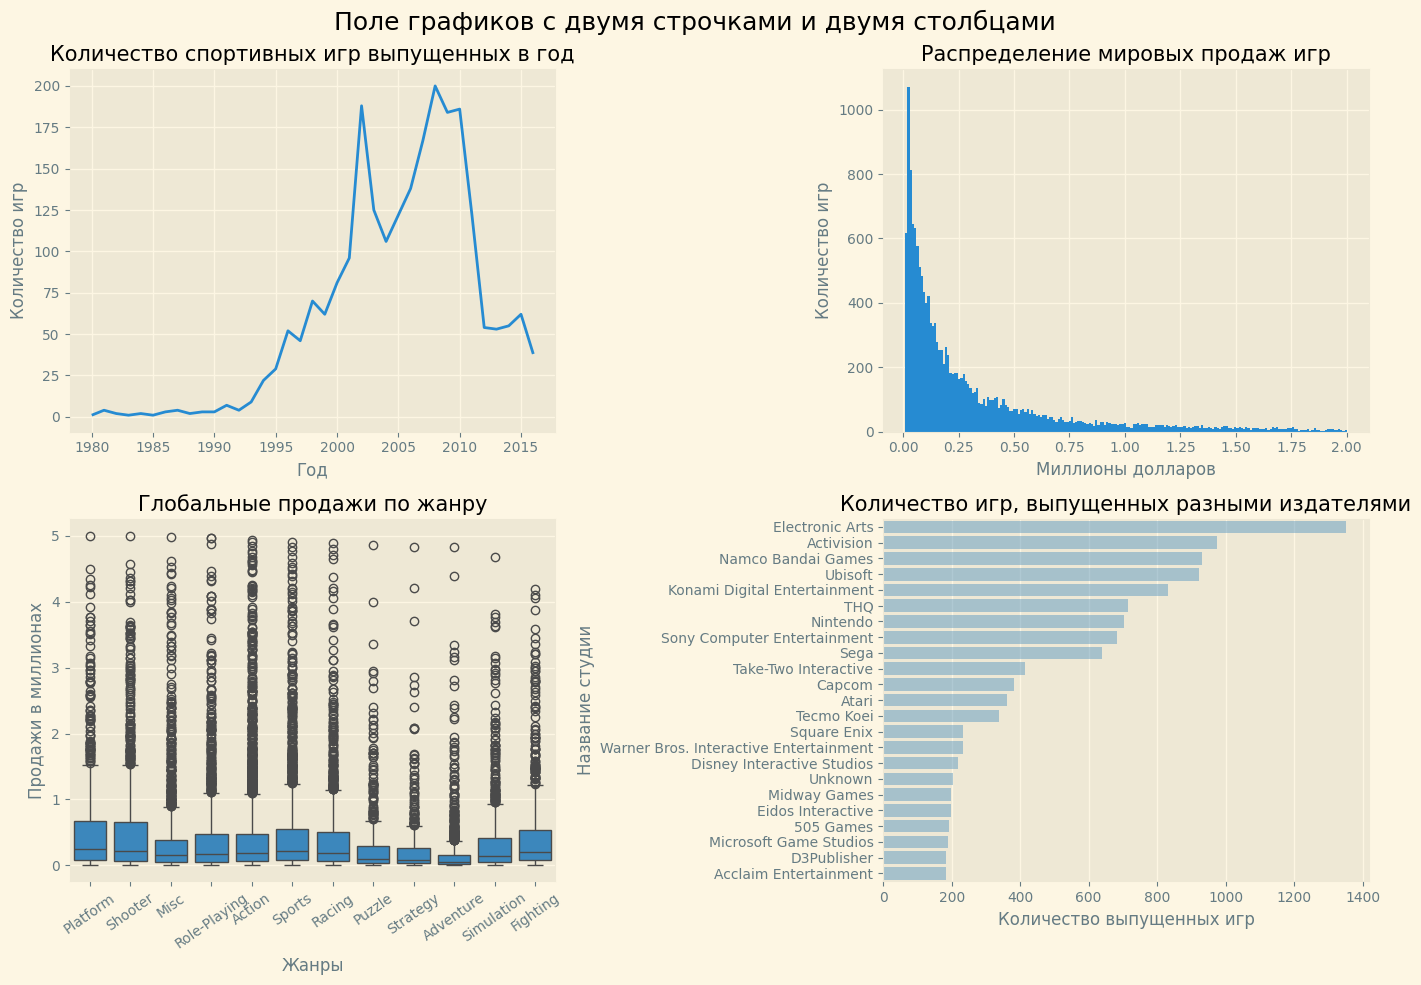

In [ ]:
plt.style.use('Solarize_Light2')

subplots_class()

In [ ]:
plt.style.use('default')

Как создавать свой стиль для matplotlib?

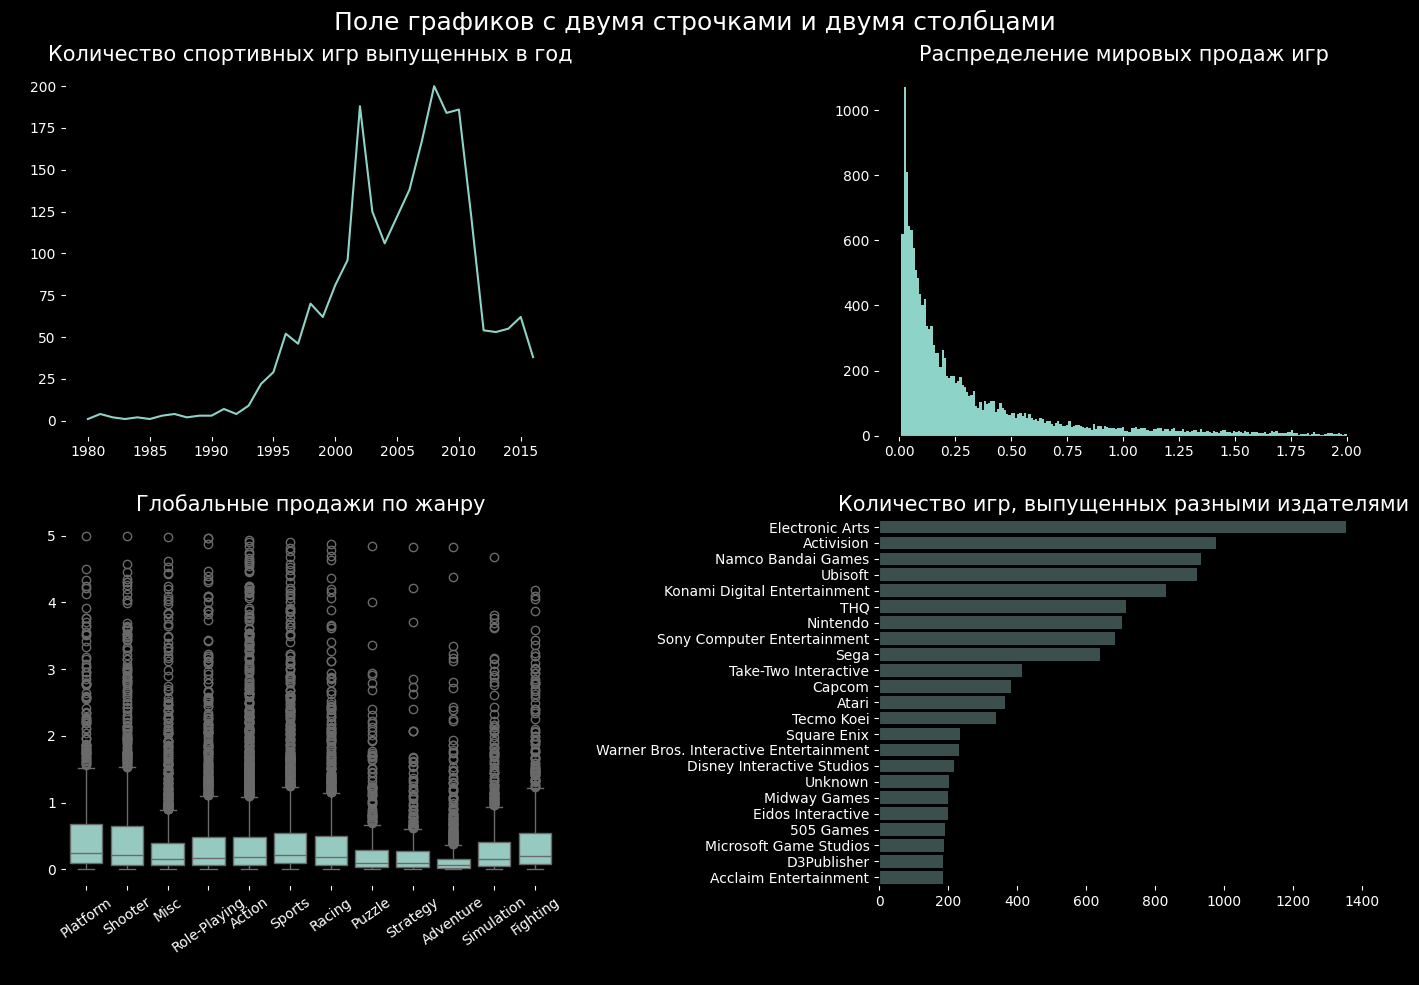

In [ ]:
plt.style.use('default')
plt.style.use('my_style.mplstyle')
subplots_class()

### Смена шрифта глобально и локально

О всех параметрах кастамизации вработе со шрифтом можно посмотреть [здесь](https://matplotlib.org/stable/users/explain/text/text_props.html).

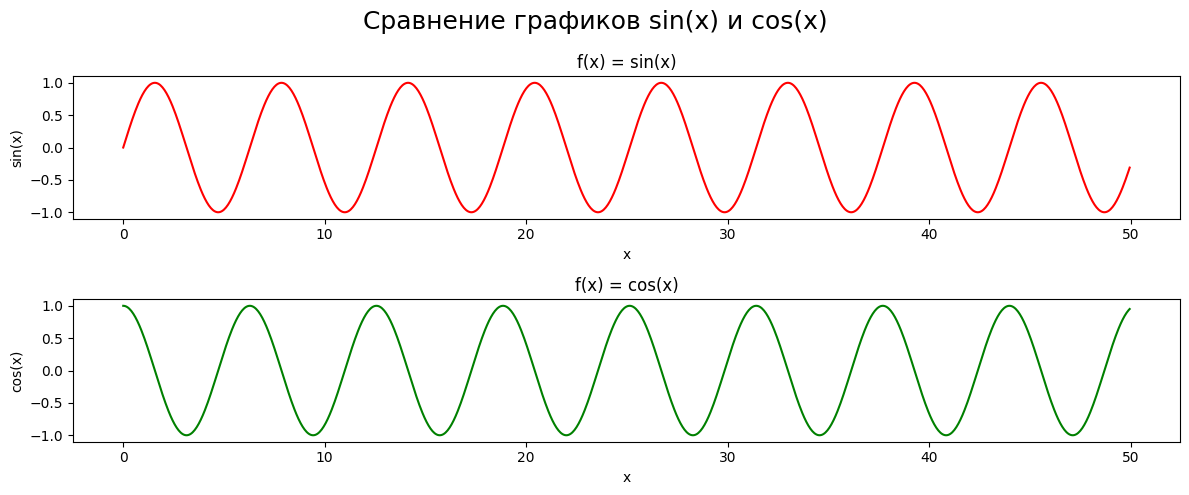

In [ ]:
plt.style.use('default')

fig, axs = plt.subplots(2, 1, figsize=(12, 5))
fig.suptitle('Сравнение графиков sin(x) и cos(x)', fontsize=18)

x_ax = np.arange(0, 50, 0.05)
y_ax_1 = np.sin(x_ax)
y_ax_2 = np.cos(x_ax)

axs[0].plot(x_ax, y_ax_1, color = 'red')
axs[0].set_title("f(x) = sin(x)")
axs[0].set_xlabel("x")
axs[0].set_ylabel("sin(x)")

axs[1].plot(x_ax, y_ax_2, color = 'green')
axs[1].set_title("f(x) = cos(x)")
axs[1].set_xlabel("x")
axs[1].set_ylabel("cos(x)")

plt.tight_layout()

Глобальная смена шрифта

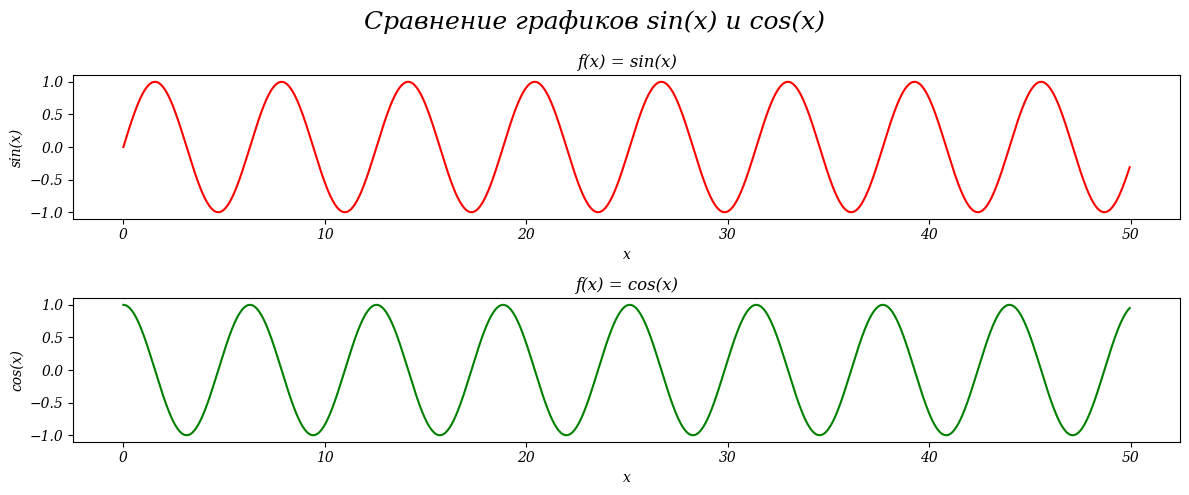

In [ ]:
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.style"] = "italic"


fig, axs = plt.subplots(2, 1, figsize=(12, 5))
fig.suptitle('Сравнение графиков sin(x) и cos(x)', fontsize=18)

x_ax = np.arange(0, 50, 0.05)
y_ax_1 = np.sin(x_ax)
y_ax_2 = np.cos(x_ax)

axs[0].plot(x_ax, y_ax_1, color = 'red')
axs[0].set_title("f(x) = sin(x)")
axs[0].set_xlabel("x")
axs[0].set_ylabel("sin(x)")

axs[1].plot(x_ax, y_ax_2, color = 'green')
axs[1].set_title("f(x) = cos(x)")
axs[1].set_xlabel("x")
axs[1].set_ylabel("cos(x)")

plt.tight_layout()

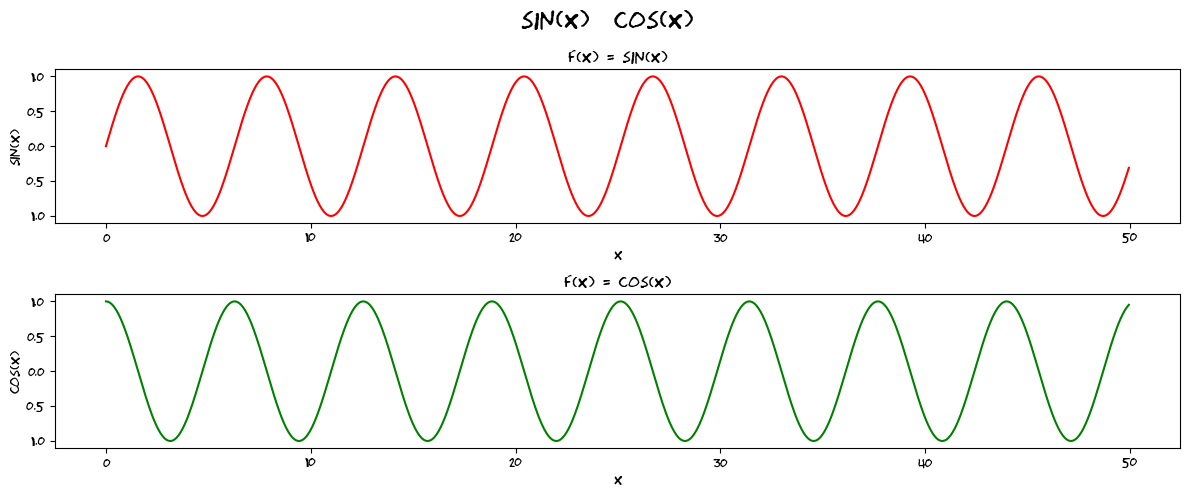

In [ ]:
plt.style.use('default')
plt.rcParams["font.family"] = "fantasy"


fig, axs = plt.subplots(2, 1, figsize=(12, 5))
fig.suptitle('Сравнение графиков sin(x) и cos(x)', fontsize=18)

x_ax = np.arange(0, 50, 0.05)
y_ax_1 = np.sin(x_ax)
y_ax_2 = np.cos(x_ax)

axs[0].plot(x_ax, y_ax_1, color = 'red')
axs[0].set_title("f(x) = sin(x)")
axs[0].set_xlabel("x")
axs[0].set_ylabel("sin(x)")

axs[1].plot(x_ax, y_ax_2, color = 'green')
axs[1].set_title("f(x) = cos(x)")
axs[1].set_xlabel("x")
axs[1].set_ylabel("cos(x)")

plt.tight_layout()

Локальная смена шрифта

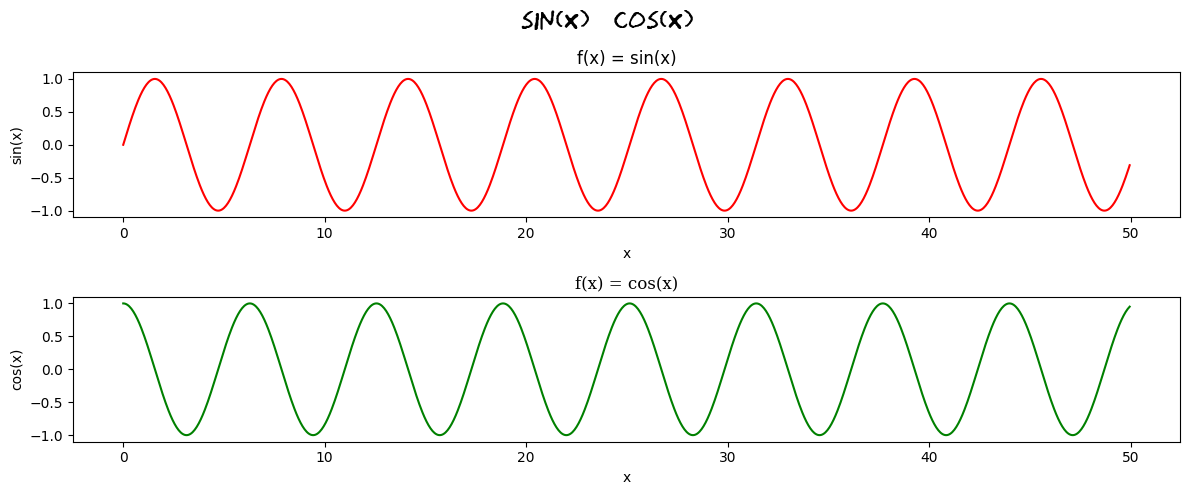

In [ ]:
plt.style.use('default')
sfont = {'fontname':'sans'}
hfont = {'fontname':'serif'}
ssfont = {'fontname':'fantasy'}

fig, axs = plt.subplots(2, 1, figsize=(12, 5))
fig.suptitle('Сравнение графиков sin(x) и cos(x)', fontsize=18, **ssfont)

x_ax = np.arange(0, 50, 0.05)
y_ax_1 = np.sin(x_ax)
y_ax_2 = np.cos(x_ax)

axs[0].plot(x_ax, y_ax_1, color = 'red')
axs[0].set_title("f(x) = sin(x)", **csfont)
axs[0].set_xlabel("x")
axs[0].set_ylabel("sin(x)")

axs[1].plot(x_ax, y_ax_2, color = 'green')
axs[1].set_title("f(x) = cos(x)", **hfont)
axs[1].set_xlabel("x")
axs[1].set_ylabel("cos(x)")

plt.tight_layout()

### Задание 1. Разогревочное: Создайте линейный график изменения доли всех продаж в Северной Америке.

<ipython-input-3-c1d9b90daee2>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_north_america = vgsales.groupby('Year').sum()[['NA_Sales', 'Global_Sales']].reset_index()


<Axes: xlabel='Year', ylabel='Share'>

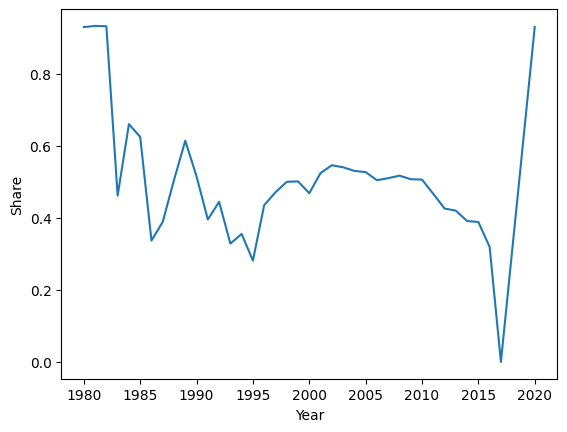

In [ ]:
sales_north_america = vgsales.groupby('Year').sum()[['NA_Sales', 'Global_Sales']].reset_index()
sales_north_america['Share'] = sales_north_america['NA_Sales'] / sales_north_america['Global_Sales']
sns.lineplot(x=sales_north_america['Year'], y=sales_north_america['Share'])

### Задание 2. Найдите период в истории компании Nintendo, когда студия издавала более 35 игр в год. Подсветите этот период красным цветом.

In [ ]:
nintendo_published = vgsales[vgsales['Publisher'] == 'Nintendo'].groupby(['Year'], as_index=False).count()[['Year', 'Rank']]
nintendo_published[nintendo_published['Rank'] >= 35]

,Year,Rank
21,2004.0,57
22,2005.0,45
23,2006.0,53
24,2007.0,42


**Поскольку больше 35 игр Нинтендо выпускало только в промежутке между 2004 и 2007, подсветим его**

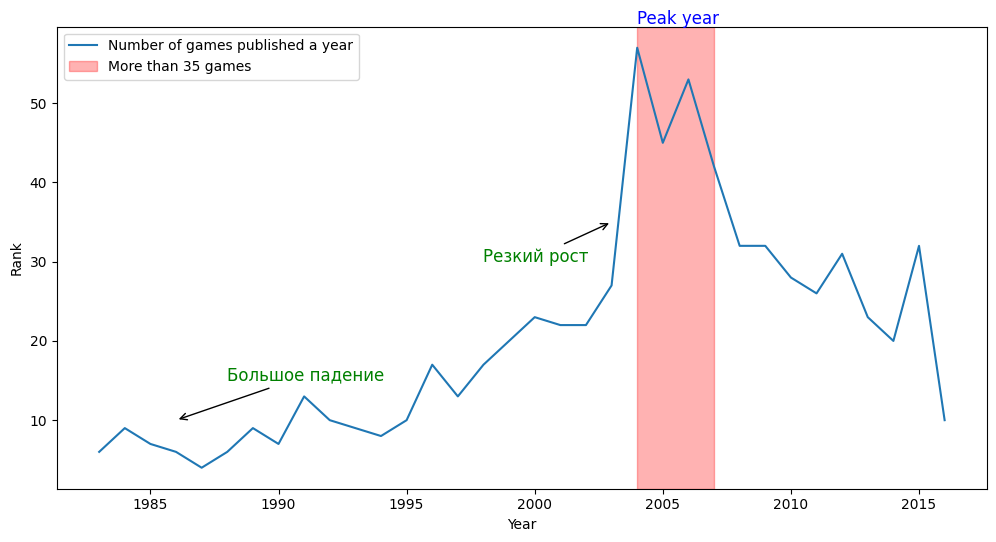

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.lineplot(x=nintendo_published['Year'], y=nintendo_published['Rank'], ax=ax, label='Number of games published a year')
ax.axvspan(2004, 2007, color='red', alpha=0.3, label='More than 35 games')
ax.legend()

ax.text(2004, 60, 'Peak year', fontsize=12, color='blue')
# Annotate a specific value on the y-axis
ax.annotate('Постепенное падение', xy=(1986, 10), xytext=(1988, 15),
            arrowprops=dict(facecolor='black', arrowstyle='->'),
            fontsize=12, color='green')
ax.annotate('Резкий рост', xy=(2003, 35), xytext=(1998, 30),
            arrowprops=dict(facecolor='black', arrowstyle='->'),
            fontsize=12, color='green')

plt.show()

### Задание 3. Создайте круговую диаграмму долей разных студий на рынке Северной Америки в 2010 году.

Поскольку разных студий достаточно много, оставьте 25 самых популярных.

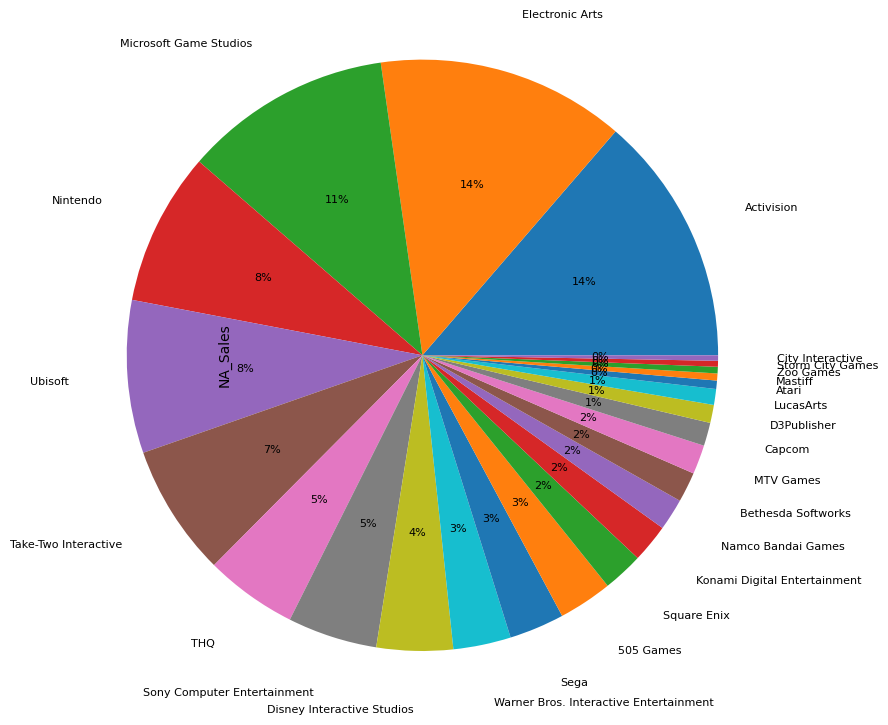

In [ ]:
us_share_2011 = vgsales[vgsales['Year'] == 2010].groupby('Publisher')['NA_Sales'].sum().sort_values(ascending=False)[:25]

plot = us_share_2011.plot.pie(fontsize=8, autopct='%1.0f%%', labeldistance=1.2, radius=2)

### Задание 4. Возьмем 25 самых продуктивных студий (с точки зрения выпуска игр). Определить долю всех выпущенных игр каждой студией в год.

In [ ]:
top_publishers = vgsales['Publisher'].value_counts().reset_index()['index'][:25]
vgsales_popular = vgsales[vgsales['Publisher'].isin(top_publishers)]

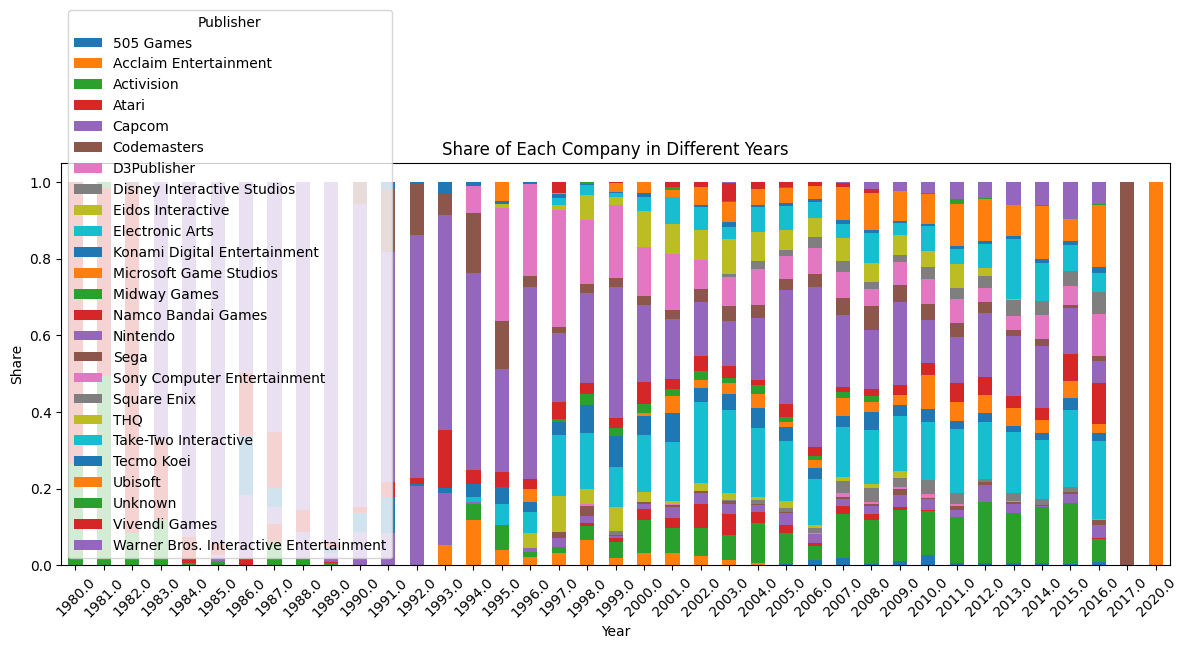

In [ ]:
publisher_year_sales = vgsales_popular.groupby(['Publisher', 'Year'])['Global_Sales'].sum().reset_index()

total_sales_per_year = vgsales_popular.groupby('Year')['Global_Sales'].sum()

publisher_year_sales['Share'] = publisher_year_sales.apply(lambda x: x['Global_Sales'] / total_sales_per_year[x['Year']], axis=1)

pivot_table = publisher_year_sales.pivot(index='Year', columns='Publisher', values='Share').fillna(0)

pivot_table.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Share of Each Company in Different Years')
plt.xlabel('Year')
plt.ylabel('Share')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Bonus: Продолжение введения в `plotly`

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

df_stocks = px.data.stocks() # Встроенный в Plotly датасет

df_stocks.head()

,date,GOOG,AAPL,AMZN,FB,NFLX,MSFT
0,2018-01-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2018-01-08,1.018172,1.011943,1.061881,0.959968,1.053526,1.015988
2,2018-01-15,1.032008,1.019771,1.053240,0.970243,1.049860,1.020524
3,2018-01-22,1.066783,0.980057,1.140676,1.016858,1.307681,1.066561
4,2018-01-29,1.008773,0.917143,1.163374,1.018357,1.273537,1.040708


In [ ]:
px.line(df_stocks, x='date',
        y='GOOG',
        labels={"date": "Дата", "GOOG": "Стоимость акций относительно 1 января 2018 года"},
        title="Динамика изменения стоимости акций Google с 1 января 2018 года")

In [ ]:
fig = px.line(df_stocks, x='date',
        y=['GOOG', 'MSFT'],
        labels={"date": "Дата", "value": "Стоимость акций относительно 1 января 2018 года"},
        title='Google vs Microsoft')
fig

In [ ]:
fig.update_layout(
    font_family="Courier New",
    font_color="gray",
    title_font_family="Calibri",
    title_font_color="red",
    legend_title_font_color="green"
)
fig.update_xaxes(title_font_family="Arial")
fig.show()

In [ ]:
fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=df_stocks.date, y=df_stocks.MSFT, mode='lines+markers', name='Microsoft'))
fig2.add_trace(go.Scatter(x=df_stocks.date, y=df_stocks.GOOG, mode='lines+markers', name='Google'))
fig2.show()

### Задание 5. Для 20 самых популярных платформ определите долю от всех игр, которые выходили на каждой платформе в разные года.

Для создания визуализации воспользуйтесь методом `df.plot.barh()` библиотеки `pandas`.

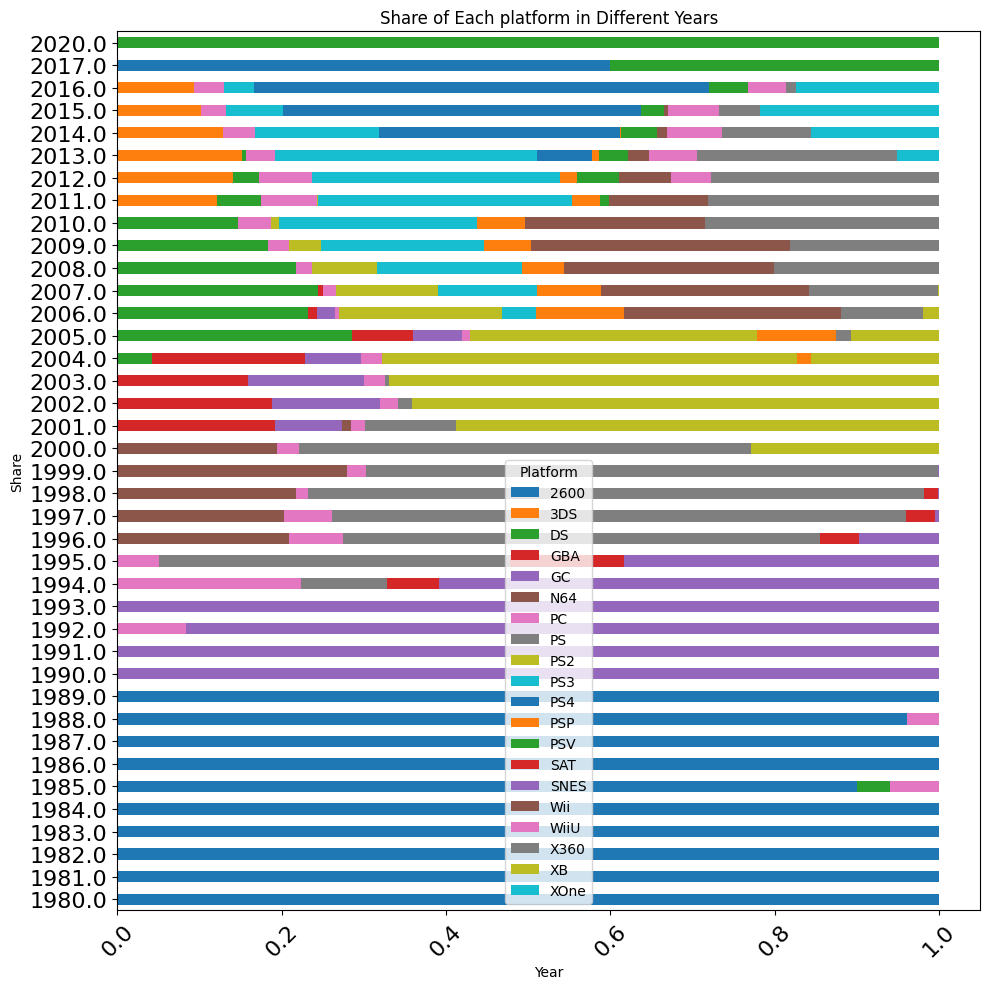

In [ ]:
top_platforms = vgsales['Platform'].value_counts().reset_index()['index'][:20]
vgsales_popular = vgsales[vgsales['Platform'].isin(top_platforms)]

platform_year_sales = vgsales_popular.groupby(['Platform', 'Year'])['Global_Sales'].sum().reset_index()

total_sales_per_year = vgsales_popular.groupby('Year')['Global_Sales'].sum()

platform_year_sales['Share'] = platform_year_sales.apply(lambda x: x['Global_Sales'] / total_sales_per_year[x['Year']], axis=1)

pivot_table = platform_year_sales.pivot(index='Year', columns='Platform', values='Share').fillna(0)

pivot_table.plot.barh(figsize=(10,10), fontsize=16, stacked=True, title='Гендерная структура заемщиков')
plt.title('Share of Each platform in Different Years')
plt.xlabel('Year')
plt.ylabel('Share')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Задание 6. Определите 3 жанра и 4 платформы с самыми большими продажами игр в мире за всё время.

Постройте сетку графиков 4 на 3, в каждой ячейке постройте точечный график, проверяющий зависимость общемировых продаж от продаж в Северной Америке для каждой пары (жанра, платформы). Разными цветами укажите игры разных годов.

In [ ]:
top_genre = vgsales[['Genre', 'Global_Sales']].groupby('Genre', as_index=False)\
                        .sum().sort_values(by='Global_Sales', ascending=False, ignore_index=True)\
                        .iloc[0:3, :]

top_genres = top_genre['Genre'].values
top_genres

array(['Action', 'Sports', 'Shooter'], dtype=object)

In [ ]:
top_platform = vgsales[['Platform', 'Global_Sales']].groupby('Platform', as_index=False)\
                        .sum().sort_values(by='Global_Sales', ascending=False, ignore_index=True)\
                        .iloc[0:4, :]
top_platform

,Platform,Global_Sales
0,PS2,1255.64
1,X360,979.96
2,PS3,957.84
3,Wii,926.71


In [ ]:
top_platforms = top_platform['Platform'].values
top_platforms

array(['PS2', 'X360', 'PS3', 'Wii'], dtype=object)

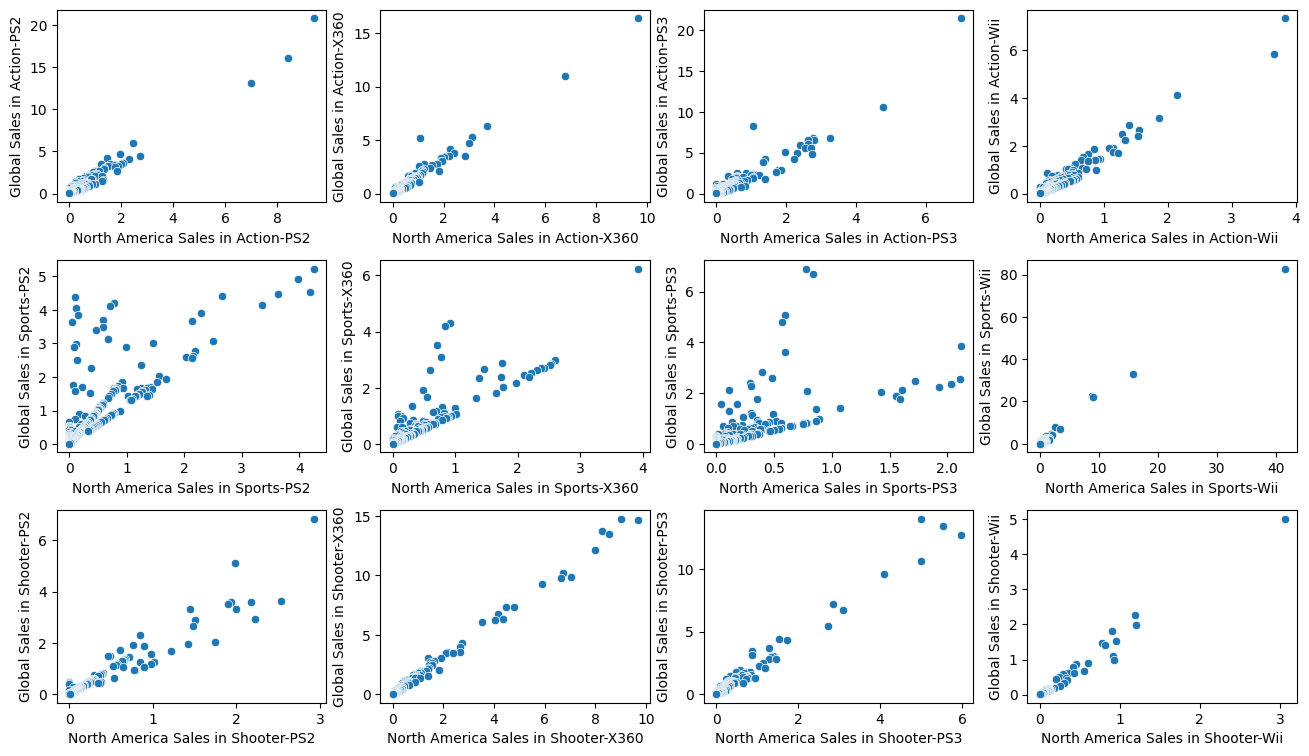

In [ ]:
m = 0
n = 0
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(16, 9))

for i in top_genres:
    for j in top_platforms:
        sns.scatterplot(x=vgsales[(vgsales['Platform']==j)&(vgsales['Genre']==i)]['NA_Sales'],
                y=vgsales[(vgsales['Platform']==j)&(vgsales['Genre']==i)]['Global_Sales'], ax=ax[n][m])
        ax[n][m].set_ylabel(f'Global Sales in {top_genres[n]}-{top_platforms[m]}')
        ax[n][m].set_xlabel(f'North America Sales in {top_genres[n]}-{top_platforms[m]}')
        m += 1
    n += 1
    m = 0

plt.subplots_adjust(hspace=0.3)

Альтернативный, более элегантный, но продвинутый способ:

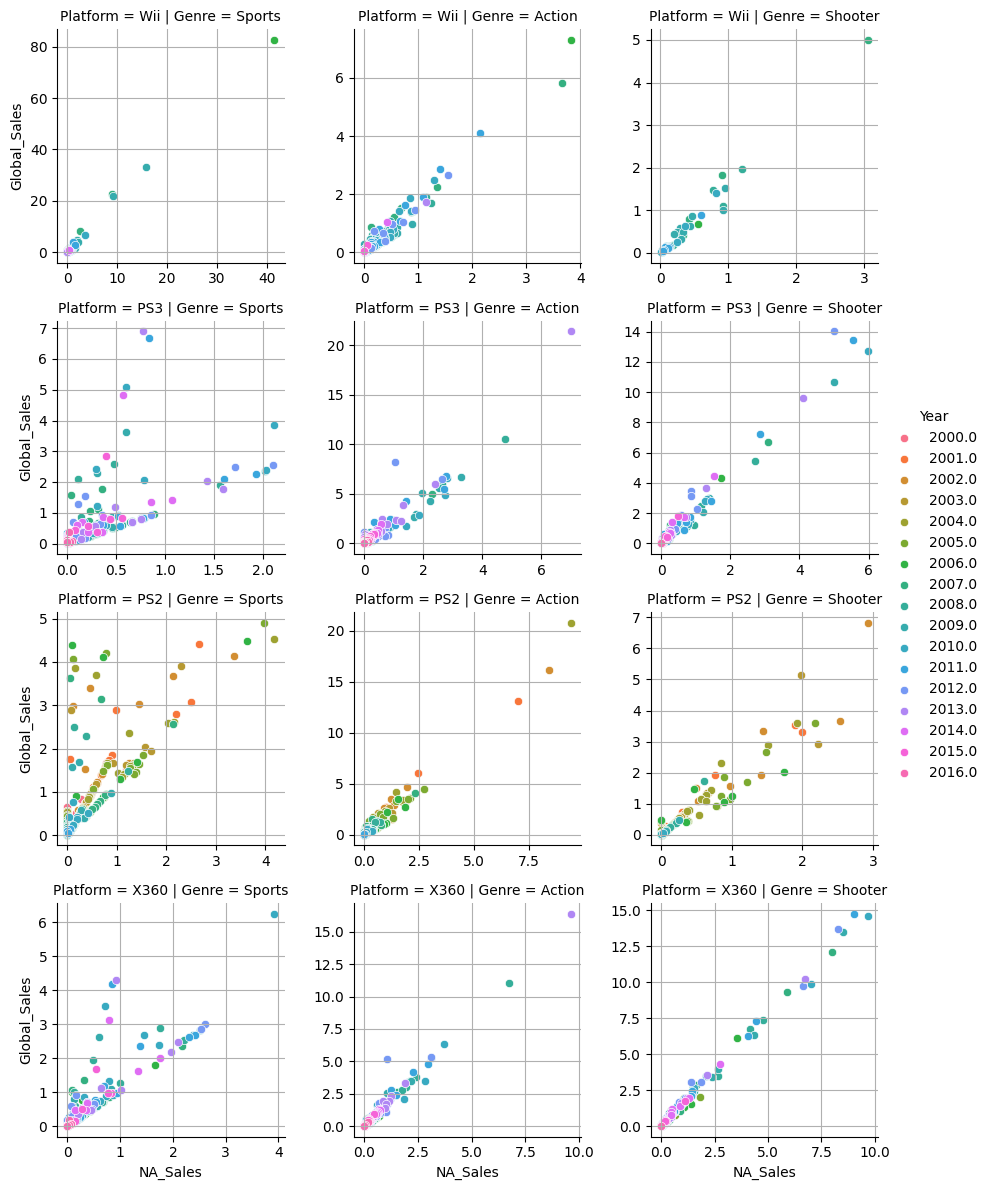

In [ ]:
top_genres = vgsales.groupby("Genre")["Global_Sales"].sum().nlargest(3).index
top_platforms = vgsales.groupby("Platform")["Global_Sales"].sum().nlargest(4).index

# Фильтруем данные
data = vgsales.query("Genre in @top_genres and Platform in @top_platforms")

# Определяем фасетку
g = sns.FacetGrid(data, row="Platform", col="Genre", hue="Year",
                  sharex=False, sharey=False)
g.map(sns.scatterplot, "NA_Sales", "Global_Sales")

g.add_legend()

# Добавляем сетку
for ax_list in g.axes:
    for ax in ax_list:
        ax.grid()

plt.show()

### Задание 7. Используя правило трех сигм избавьтесь от всех выбросов в глобальных продажах внутри разных игровых жанров. Полученные распределения выведите на отдельных графиков для каждого жанра.

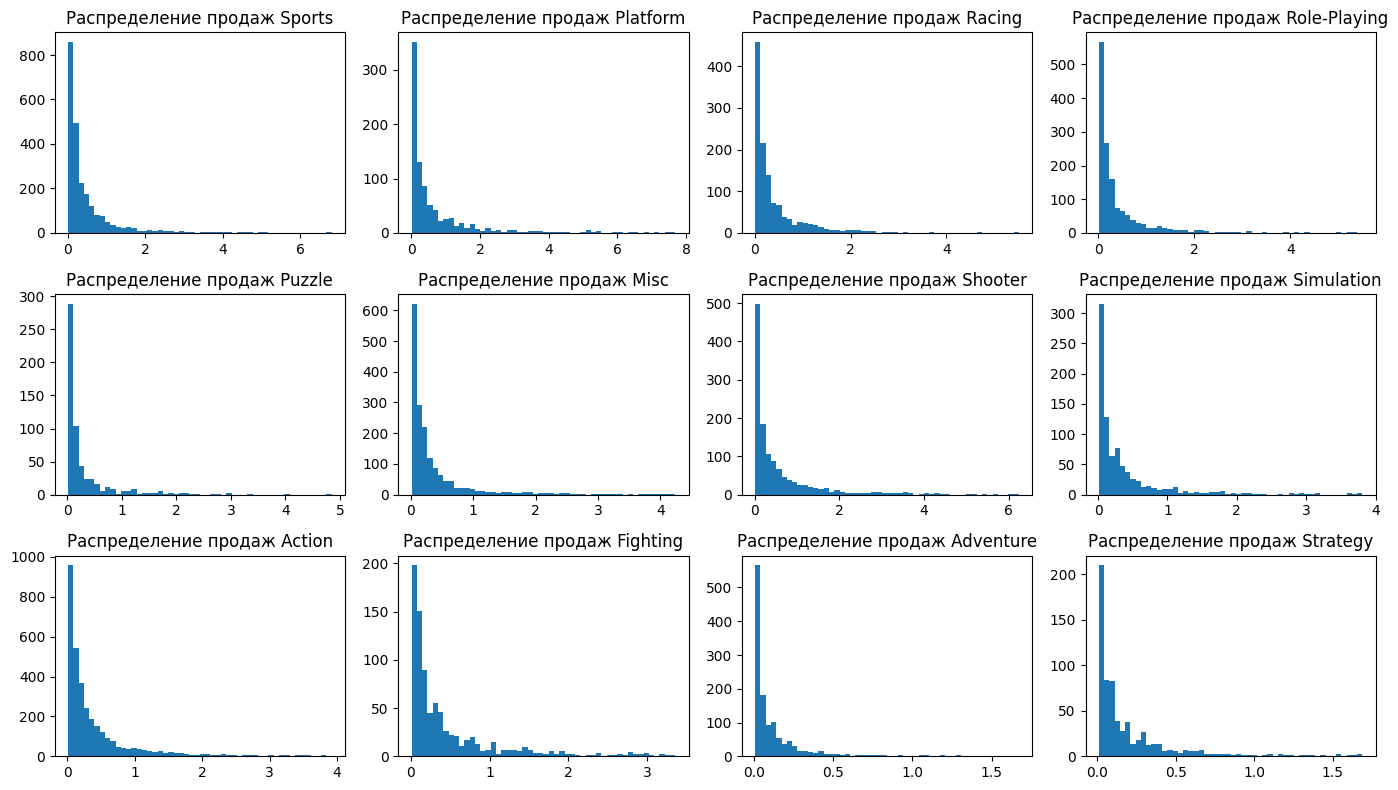

In [ ]:
fig, axes = plt.subplots(3, 4, figsize=(14, 8))

for i, j in enumerate(vgsales['Genre'].unique()):
  category_sales = vgsales[vgsales['Genre'] == j]['Global_Sales']
  category_sales = category_sales[(abs(category_sales - category_sales.mean()) / (3 * category_sales.std())) <= 1]
  axes[i // 4, i % 4].hist(category_sales, bins=50)
  axes[i // 4, i % 4].set_title(f"Распределение продаж {j}")
plt.tight_layout()

**NB:** Важно!

Такое применение правила трех сигм статистически необосновано, поскольку мы имеет дело не с нормальным распределением. В такой ситуации лучше использовать ящик с усами, который является универсальным.